# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Import all you need</p>

In [336]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler , StandardScaler 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
import joblib

import warnings
warnings.filterwarnings('ignore')

In [312]:
df = pd.read_csv(r'/kaggle/input/breast-cancer-wisconsin/data.csv').drop(columns=['id','Unnamed: 32'])
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA</p>

In [313]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [314]:
df.shape

(569, 31)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [316]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### with values like "M" for malignant and possibly "B" for benign

In [317]:
df['diagnosis'].replace({'M': 1, 'B': 0}, inplace=True)

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Visualization</p>

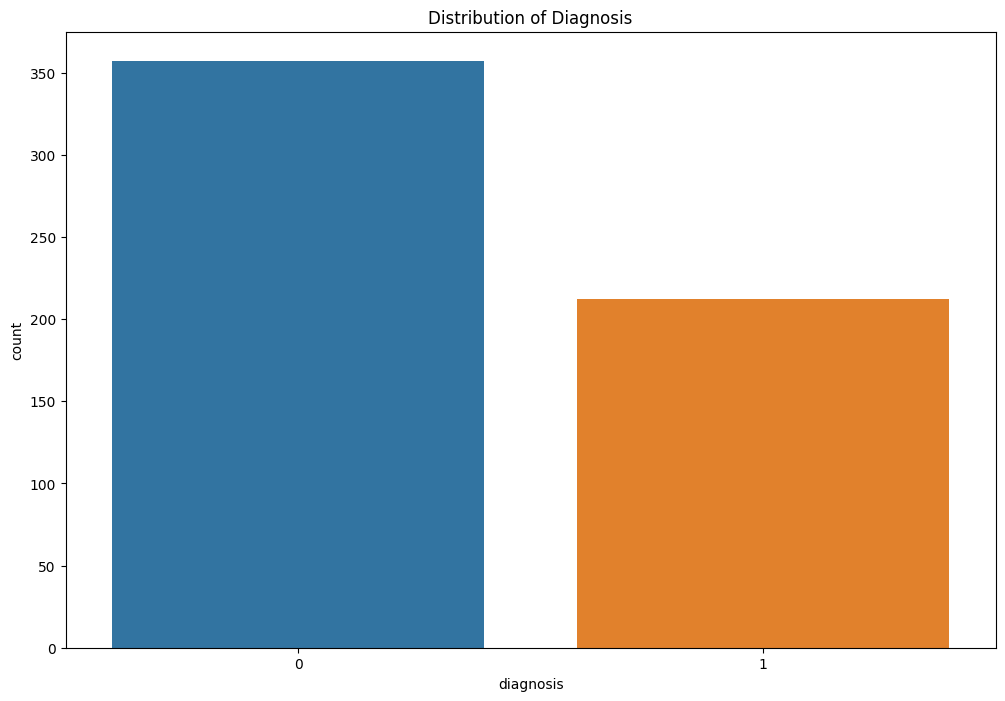

In [318]:
# Data visualization
plt.figure(figsize=(12, 8))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis')
plt.show()

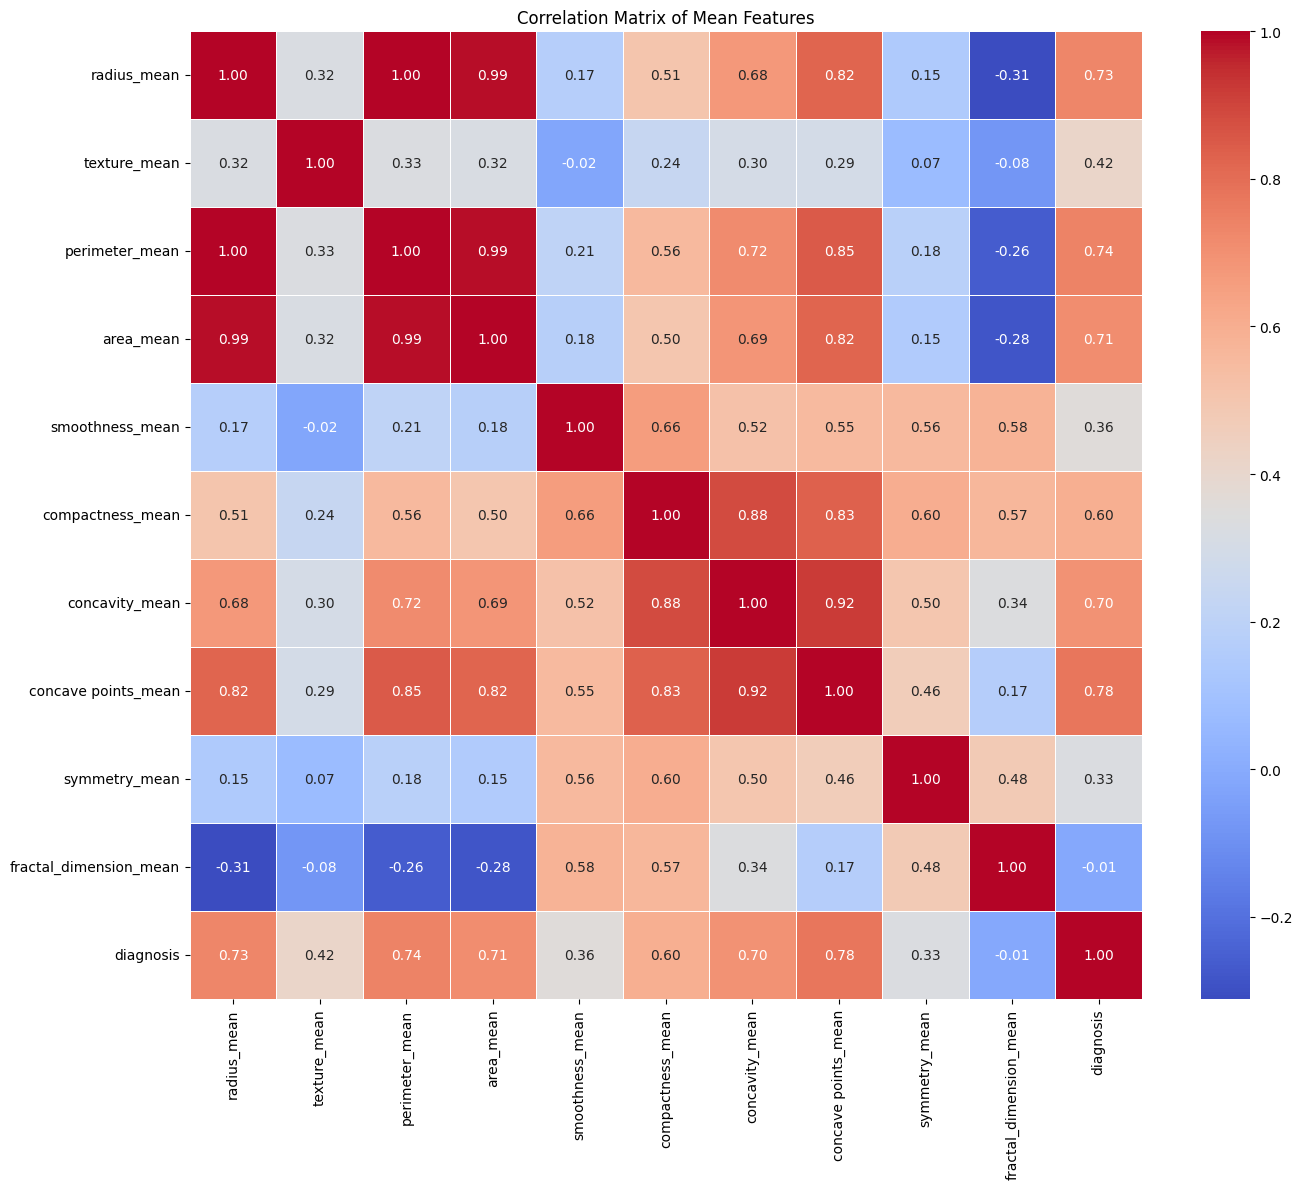

In [319]:
mean_features = [col for col in df.columns if '_mean' in col]
plt.figure(figsize=(14, 12))
corr_matrix = df[mean_features + ['diagnosis']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Mean Features')
plt.tight_layout()
plt.show()


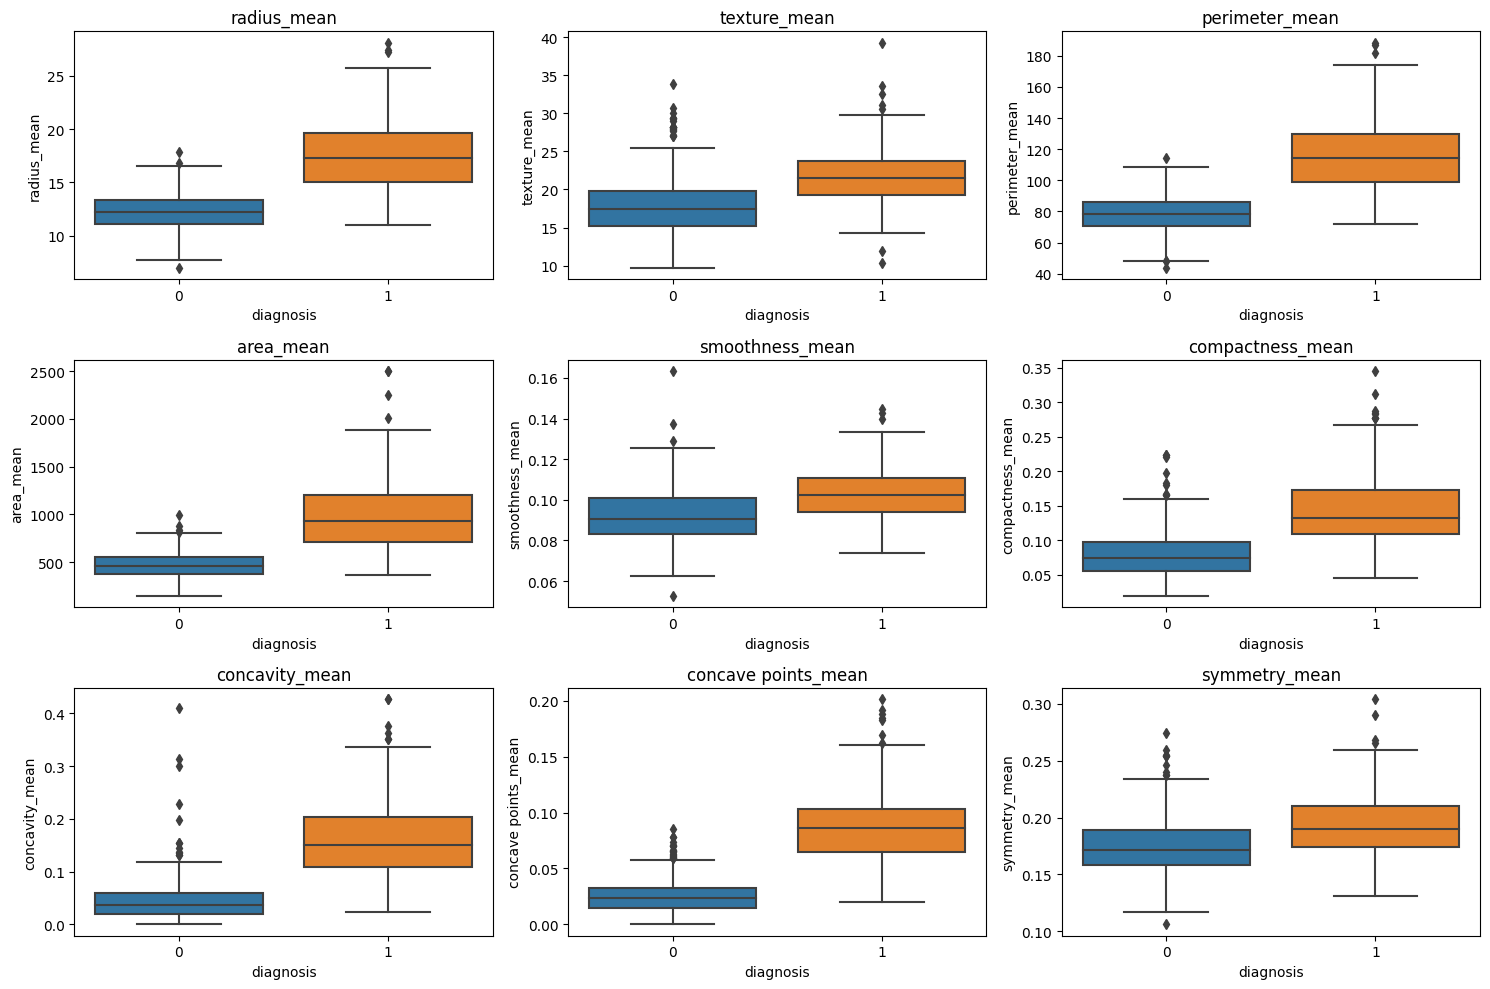

In [320]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(mean_features[:9]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Preprocessing </p>

In [321]:
f=[]
for i in df.columns:
    if i !='diagnosis':
        f.append(i)


scaler = MinMaxScaler()
df[f] = scaler.fit_transform(df[f])

In [322]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [323]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[f])


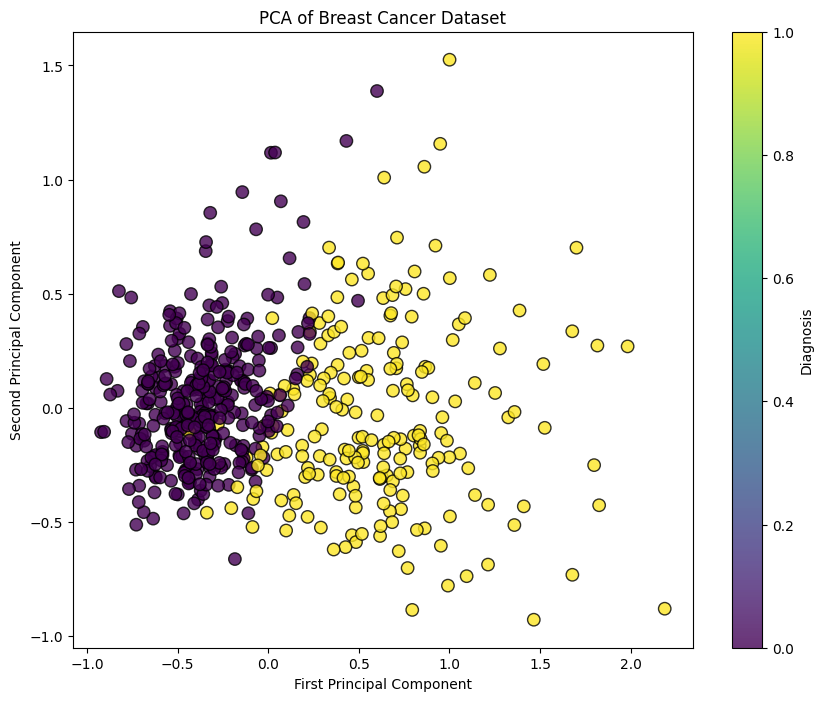

In [324]:
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', 
            alpha=0.8, edgecolors='k', s=80)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar(label='Diagnosis')
plt.show()

In [325]:
print("\nPCA explained variance ratio:")
print(pca.explained_variance_ratio_)
print(f"Total variance explained: {sum(pca.explained_variance_ratio_)*100:.2f}%")



PCA explained variance ratio:
[0.53097689 0.1728349 ]
Total variance explained: 70.38%


## find best model by pycaret:

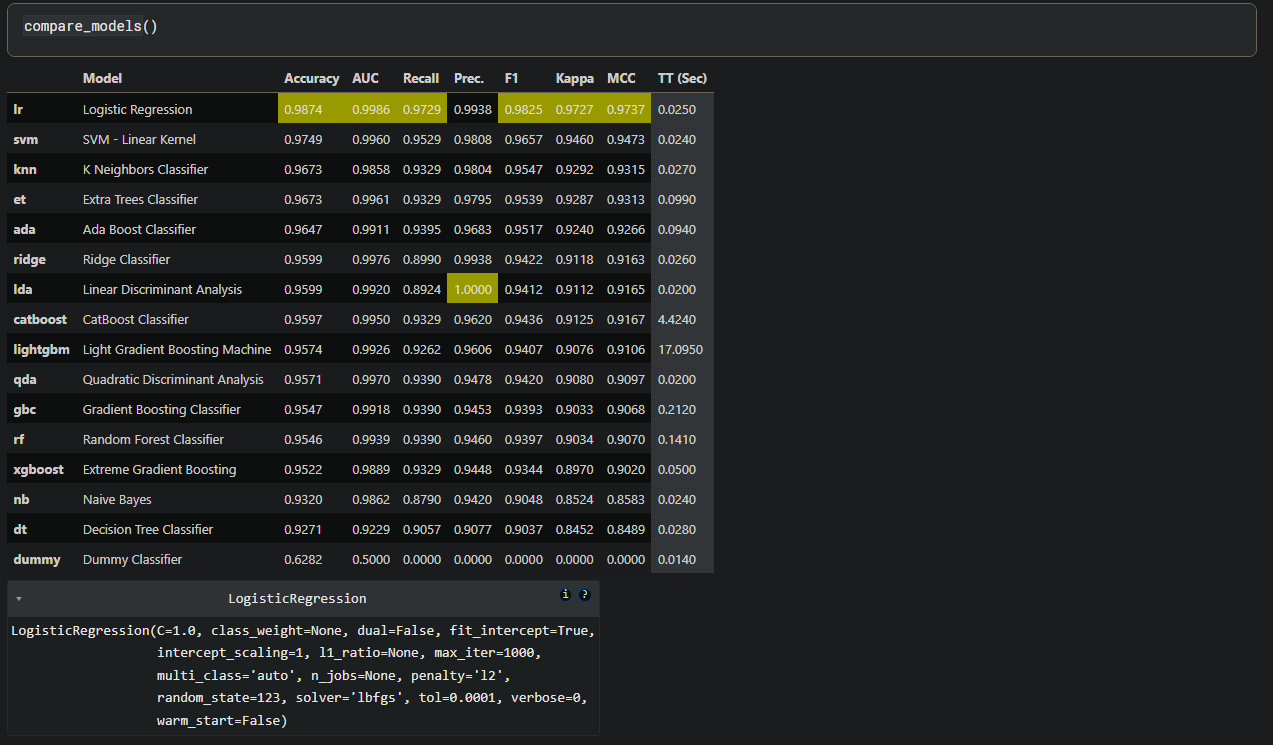

In [326]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y)


# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">build first model</p>

In [327]:
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [328]:
cv_scores = cross_val_score(lr, X, y, cv=5)
print("\nCross-validation scores:", cv_scores)
print(f"Average CV score: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



Cross-validation scores: [0.95614035 0.96491228 0.97368421 0.95614035 0.96460177]
Average CV score: 0.9631 ± 0.0065



Test accuracy: 0.9790


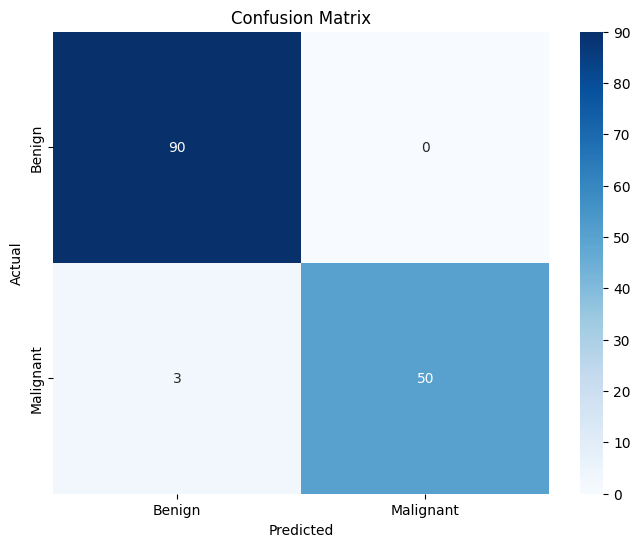


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        90
           1       1.00      0.94      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.97      0.98       143
weighted avg       0.98      0.98      0.98       143



In [329]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest accuracy: {accuracy:.4f}")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


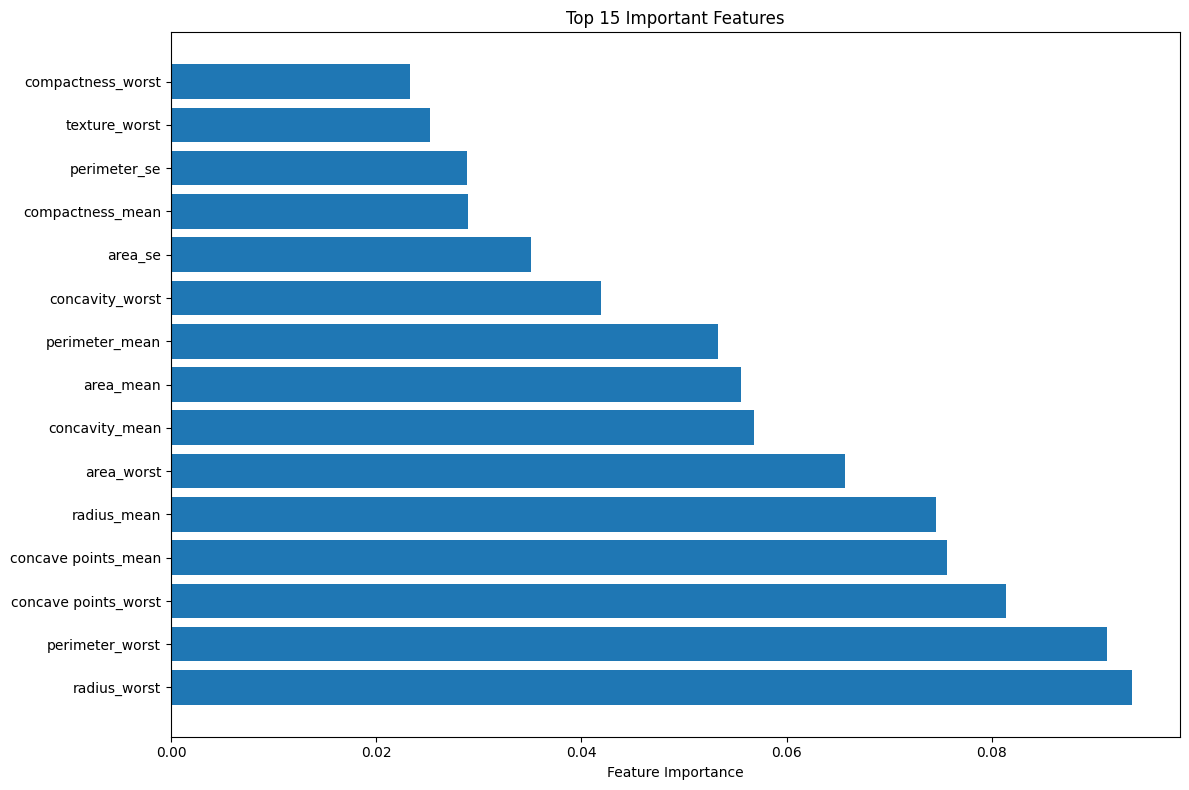

In [330]:
# Feature importance
feature_importances = etc.feature_importances_
feature_names = X.columns

# Sort features by importance
indices = np.argsort(feature_importances)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]
sorted_importances = feature_importances[indices]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_importances[:15])), sorted_importances[:15], align='center')
plt.yticks(range(len(sorted_importances[:15])), sorted_feature_names[:15])
plt.xlabel('Feature Importance')
plt.title('Top 15 Important Features')
plt.tight_layout()
plt.show()

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">build best model</p>

In [331]:
def build_logistic_regression(X_train, y_train):
    """Build and train a Logistic Regression model"""
    print("\n===== LOGISTIC REGRESSION MODEL =====")
    
    # Define parameter grid for grid search
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', None],
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga'],
        'class_weight': [None, 'balanced']
    }
    
    # Create logistic regression model
    base_model = LogisticRegression(random_state=42, max_iter=1000)
    

    
    # Use cross-validation to find best parameters
    print("Performing grid search for best parameters...")
    grid_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        verbose=0
    )
    
    grid_search.fit(X_train, y_train)


    best_etc = grid_search.best_estimator_

    train_sizes, train_scores, test_scores = learning_curve(
    best_etc, X, y, cv=5, 
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy'
    )
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Size')
    plt.ylabel('Accuracy Score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

    
    # Get best model
    best_model = grid_search.best_estimator_
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best cross-validation score: {grid_search.best_score_:.4f}")
    return best_model


In [332]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate the model performance"""
    print(f"\n===== EVALUATING {model_name} =====")
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Get probability predictions for ROC curve
    if hasattr(model, "predict_proba"):
        y_train_prob = model.predict_proba(X_train)[:, 1]
        y_test_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_train_prob = model.predict(X_train)
        y_test_prob = model.predict(X_test)
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)
    
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)
    
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    train_auc = roc_auc_score(y_train, y_train_prob)
    test_auc = roc_auc_score(y_test, y_test_prob)

    
    # Print results
    print("\nModel Performance:")
    print(f"{'Metric':<15} {'Training':<10} {'Testing':<10}")
    print(f"{'-'*35}")
    print(f"{'Accuracy':<15} {train_accuracy:.4f}     {test_accuracy:.4f}")
    print(f"{'Precision':<15} {train_precision:.4f}     {test_precision:.4f}")
    print(f"{'Recall':<15} {train_recall:.4f}     {test_recall:.4f}")
    print(f"{'F1 Score':<15} {train_f1:.4f}     {test_f1:.4f}")
    print(f"{'AUC-ROC':<15} {train_auc:.4f}     {test_auc:.4f}")
    
    # Check for overfitting
    if (train_accuracy - test_accuracy) > 0.05:
        print("\nWARNING: Possible overfitting detected.")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No CHD', 'CHD'], 
                yticklabels=['No CHD', 'CHD'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

    accuracy = accuracy_score(y_test, y_test_pred)
    print(f"\nTest accuracy: {accuracy:.4f}")

    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_test_pred))



===== LOGISTIC REGRESSION MODEL =====
Performing grid search for best parameters...


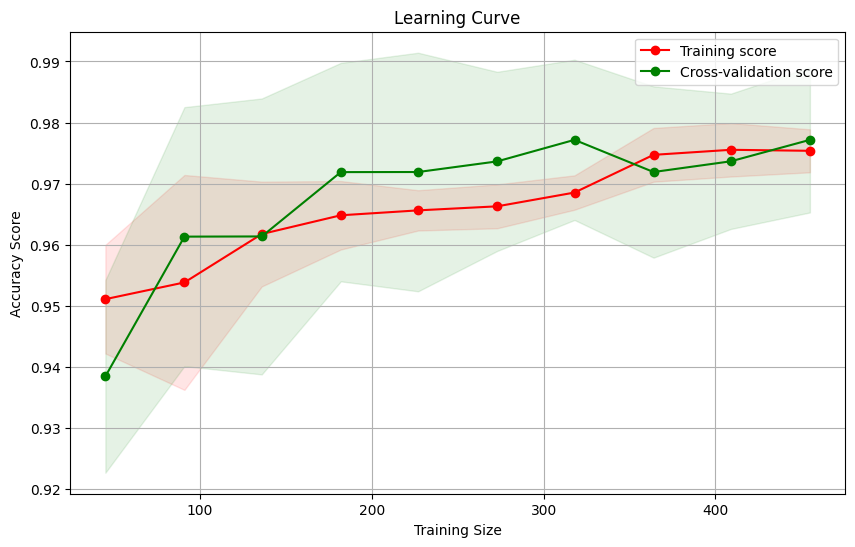

Best parameters: {'solver': 'lbfgs', 'penalty': 'l2', 'class_weight': 'balanced'}
Best cross-validation score: 0.9903


In [333]:
best_lr = build_logistic_regression(X_train, y_train)


===== EVALUATING logistic regression =====

Model Performance:
Metric          Training   Testing   
-----------------------------------
Accuracy        0.9742     0.9860
Precision       0.9805     1.0000
Recall          0.9497     0.9623
F1 Score        0.9649     0.9808
AUC-ROC         0.9927     0.9987


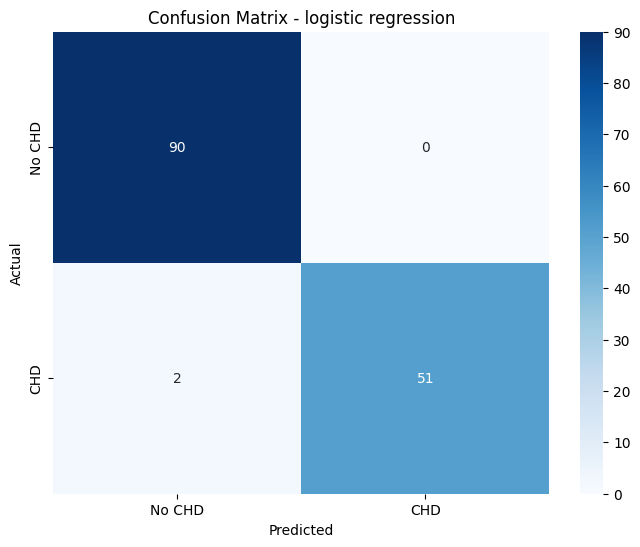


Test accuracy: 0.9860

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        90
           1       1.00      0.96      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



In [334]:
evaluate_model(best_lr, X_train, X_test, y_train, y_test, 'logistic regression')

# <p style="padding:10px;background-color:#A020F0;margin:0;color:white;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Save best model</p>

In [337]:
joblib.dump(best_lr,'pre_B_Cancer.joblib')

['pre_B_Cancer.joblib']